Welcome to the **Configuring and Visualizing Metrics with Prometheus and Grafana** lab.

In this lab,
* You will become familiar with using Prometheus to monitor sample servers simulated with node exporters.
* Node exporters simulate server applications that serve metrics through the **/metrics** endpoint.
* You will use Prometheus to monitor the target node_exporter application by scraping its metrics endpoints.
* You will also understand the Grafana UI.

# Learning Objectives

After completing this exercise, you should be able to perform the following tasks:
* Create queries to get the metrics about the target
* Find the status of the targets
* Find some information about the targets and visualize it with graphs
* Create and customize graphs in Prometheus to visualize the metrics and status of monitored targets.
* Configure and launch Grafana to source data from Prometheus.

# Prerequisites

* This lab uses Docker to run special **Node Exporters** which will behave like servers that you can monitor. 
* As a prerequisite, you will pull down the **`bitnami/node-exporter`** image from **Docker Hub**. 
* You will use this image to make three instances of node exporters.

## Your Task

1. Let’s start by opening up a new terminal. From the top menu, go to **Terminal** and choose **New Terminal** to open a new terminal window.

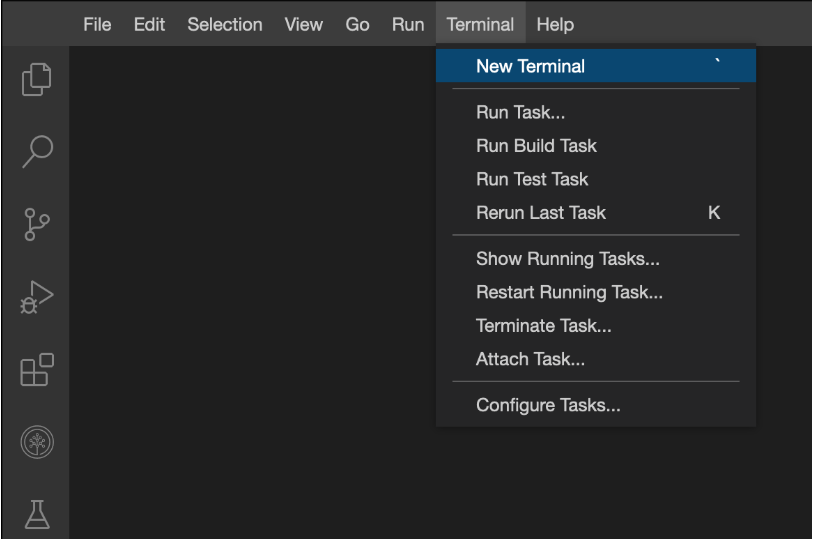

2. Use the following `docker pull` command to pull down the `bitnami/node-exporter` image from Docker Hub that you will use to simulate 3 servers being monitored.

```
docker pull bitnami/node-exporter:latest
```

You are now ready to start the lab.

# Step 1: Start the first node exporter

* Now you need some server nodes to monitor. 
* You will start up three node exporters listening on ports `9101`, `9102`, and `9103` respectively. 
* In this step you will just start the first one and ensure that it is working correctly.

## Your Task

Run the following command to create a docker network within which we will run all the docker instances.
```
docker network create monitor
```

Run the following **`docker run`** command to start a node exporter instance listening at port `9101`
```
docker run -d -p 9101:9100 --name node-exporter1 --network monitor bitnami/node-exporter:latest
```

> * *This will start a instance named node_exporter1 of node-exporter*.
> * *The output should look like this*:

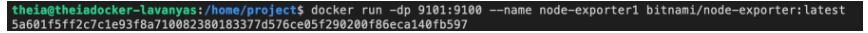

3. Next, check if the instance is running by either clicking on the **Skills Network Toolbox** and under **Others** choose **Launch Application**, enter the port number **`9101`** and click on the launch URL button. Or press the **`[Launch Application]`** button below:

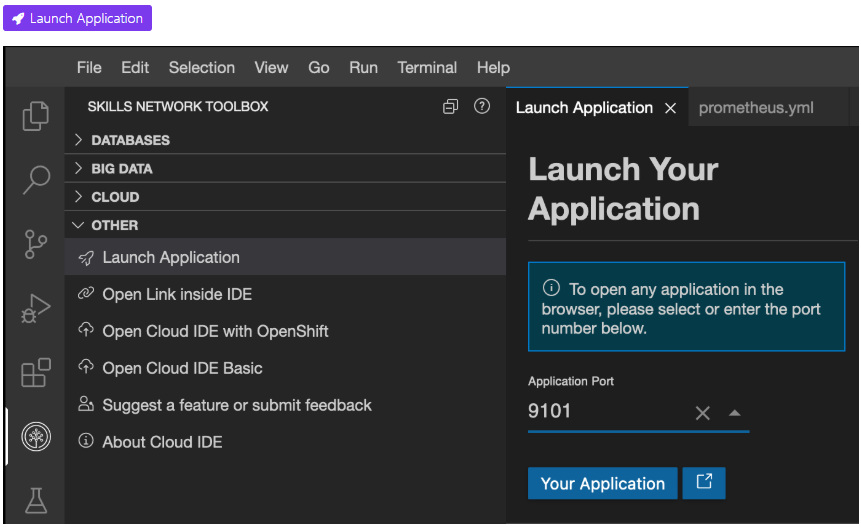

4. The node exporter page opens up as below with a hyper link to **Metrics**. These are the metrics the Prometheus instance is going to monitor.

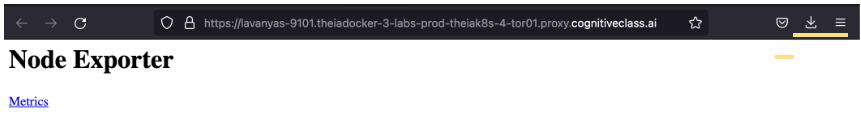

5. Click on the **Metrics** link to have a glimpse of the metrics.

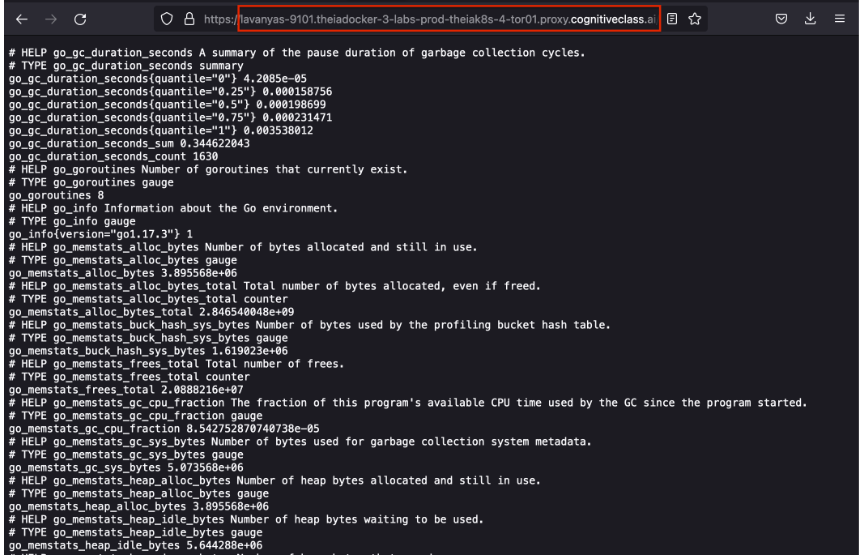

6. Copy the URL marked in red in the above image and save it in a notepad. You will use this URL to configure prometheus to monitor the node exporter.

# Step 2: Start two more node exporters

* Now that you have one node exporter working, let’s start two more so that Prometheus has three nodes to monitor in total. 
* You will do this exactly the same way as you did the first node exporter except that you will change the port numbers to `9102` and `9103` respectively.

## Your Task

1. In the terminal, now run the following commands to start two more instances of node exporter.
```
docker run -d -p 9102:9100 --name node-exporter2 --network monitor bitnami/node-exporter:latest
docker run -d -p 9103:9100 --name node-exporter3 --network monitor bitnami/node-exporter:latest
```
    
2. Now, check if all the instances of node exporter are running by using the **`docker ps`** command and grepping for **`node-exporter`**.
```
docker ps | grep node-exporter
```

## Results

If everything started correctly, you should see output similar to the following coming back from the `docker` commands:

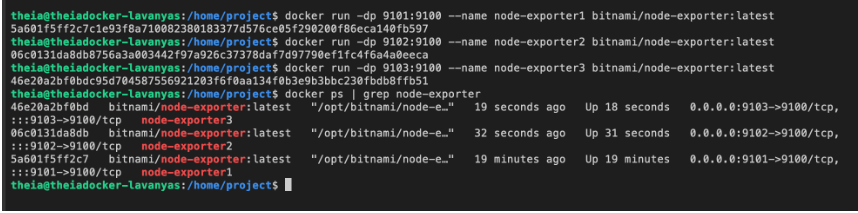

You are now ready to install and start Prometheus.

# Step 3: Download, configure and run Prometheus

* Now that we have some nodes to monitor, it’s time to run Prometheus to monitor the nodes.
* In this step you will also create a custom configuration file to tell Prometheus what nodes to monitor.
* Then you will start Prometheus passing it the configuration file to use.

## Your Task

1. First, pull the Prometheus into your local environment, by running the following `docker pull` command on your terminal.

```
docker pull bitnami/prometheus:latest
```

> *This may take a few seconds depending upon your internet connectivity*

2. Create a file named **`prometheus.yml`** in the current directory. This is the file where you will configure the prometheus to monitor the node exporter instances.
```
touch promethus.yml
```

3. From the explorer, navigate to prometheus.yml to edit the file or press the **`[Open prometheus.yml in IDE]`** button below:

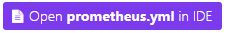

4. Add the content below to the file. Update the URLs appropriately. The **`node exporter 1`** URL will be the one that you copied into a notepad in the previous task. **`node exporter 2`** will be the same URL with port number changed to `9102`. **`node exporter 3`** will be the same URL with port number changed to `9103`.

```
# my global config
global:
  scrape_interval: 15s # Set the scrape interval to every 15 seconds. Default is every 1 minute.

scrape_configs:
  - job_name:       'node'

    static_configs:
      - targets: ['node-exporter1:9100']
        labels:
          group: 'monitoring_node_ex1'
      - targets: ['node-exporter2:9100']
        labels:
          group: 'monitoring_node_ex2'
      - targets: ['node-exporter2:9100']
        labels:
          group: 'monitoring_node_ex3'
```

A sample configuration can be seen in the image below.

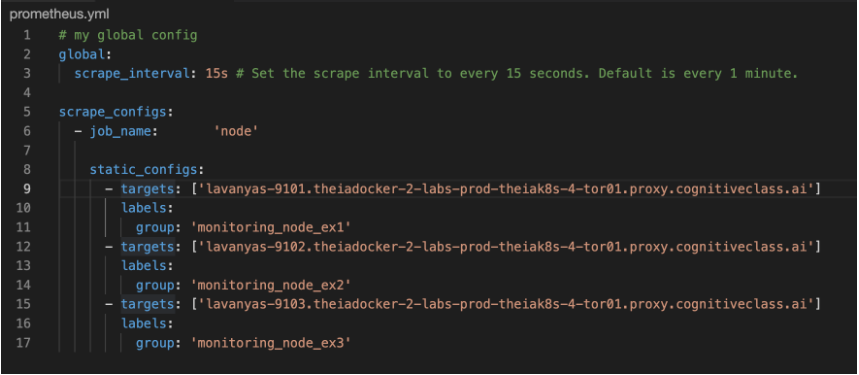

5. Now you can launch the prometheus monitor by passing this yaml file as a parameter.

```
docker run --rm --name prometheus -p 9090:9090 --network monitor \
-v $(pwd)/prometheus.yml:/opt/bitnami/prometheus/conf/prometheus.yml \
bitnami/prometheus:latest
```

## Results

You should see the Prometheus logs scroll up the screen which indicate that the monitoring has started.

# Step 4: Open the Prometheus UI

In this step you will launch the Prometheus web UI and navigate to the page where you an start executing queries.

1. Open the Prometheus web UI by click on the **Skills Network Toolbox** and under **Others** choose **Launch Application**, enter the port number **9090** and click on the launch URL button or press the Launch Prometheus button below to launch in an external browser:

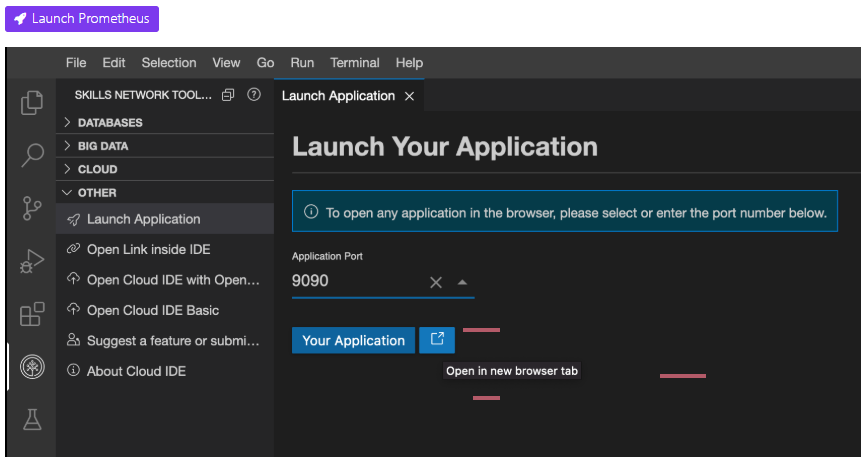

2. The Prometheus application UI opens up by default in the graph end-point.

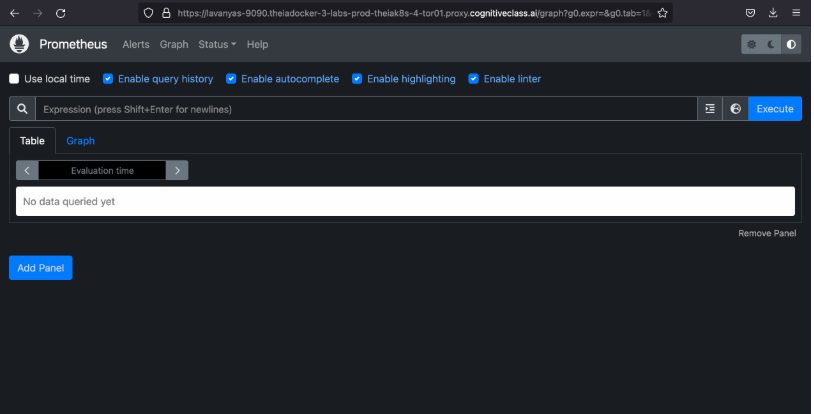

3. Next, click on **Status** on the menu and choose **Targets** to see which targets are being monitored.

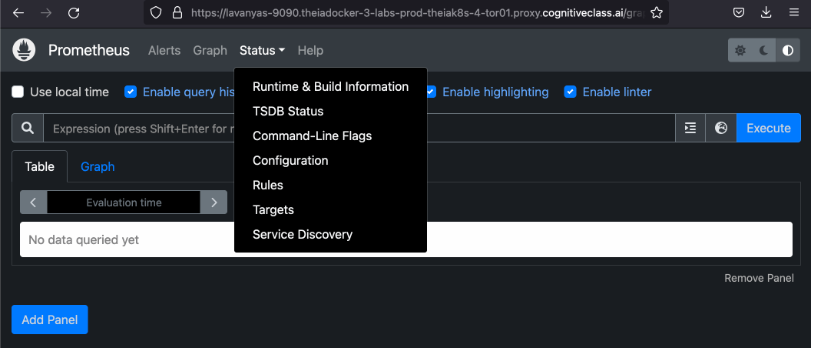

4. View the status of all the three node exporters.

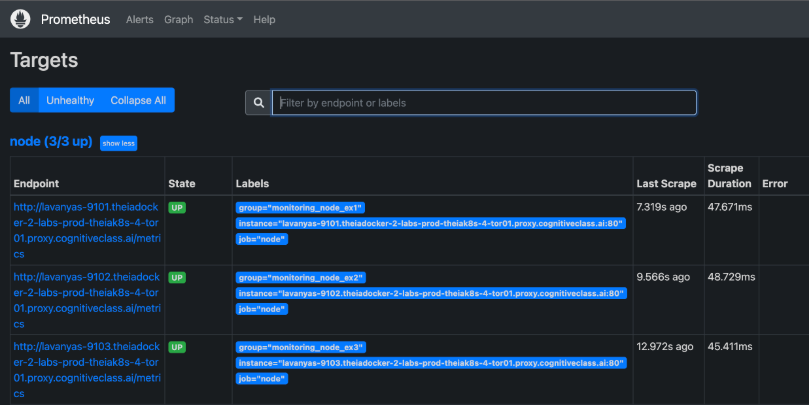

5. Click on **Graph** to return to home page

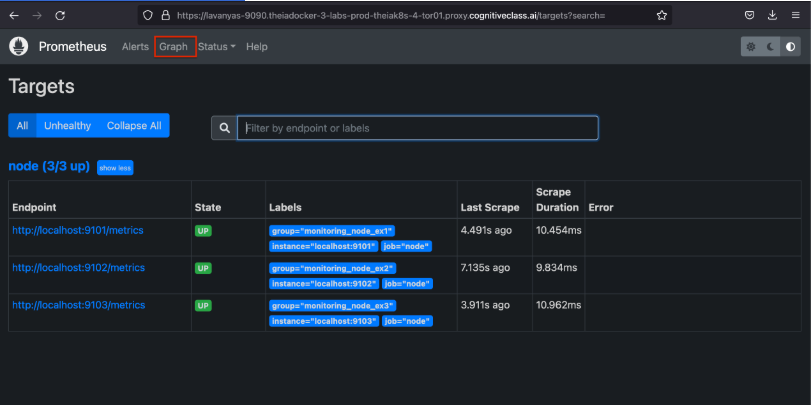

You are now ready to execute queries.

# Step 5: Execute your first query

* You are now ready to execute your first query.
* Query for the total CPU second of the nodes by pasting the following query and executing it.
* It will show the graph as given in the image.
* You can observe the details for each instance by hovering the mouse over that instance.

## Your Task

1. Pasting the following query and executing it. It will show the graph as given in the image. You can observe the details for each instance by hovering the mouse over that instance.
```
node_cpu_seconds_total
```

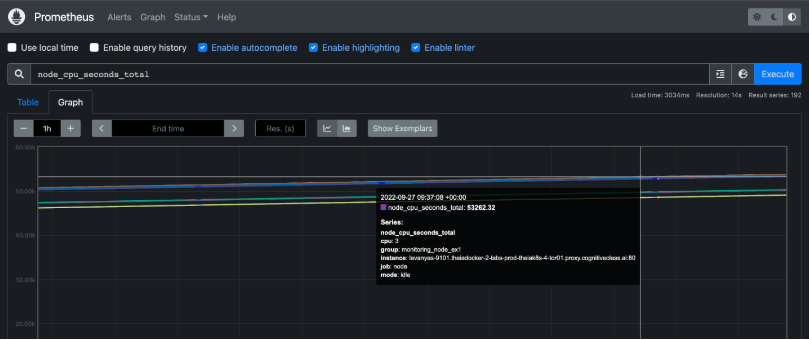

2. Next on **Table** and query the cpu second for all the targets in tabular format.

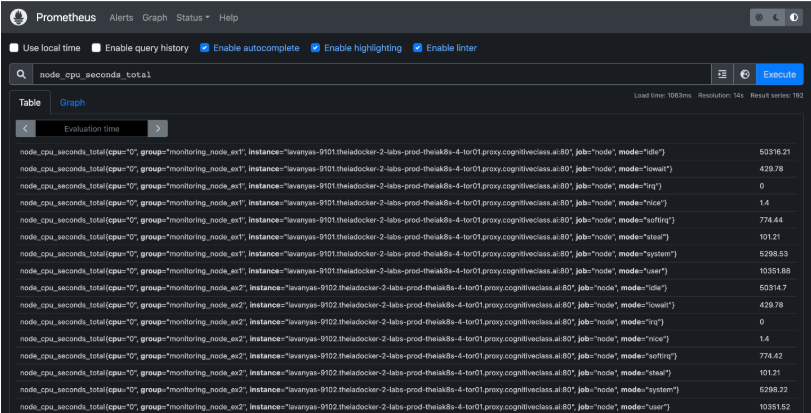

3. Now, filter the query to get the details for only one instance using the following query.
```
node_cpu_seconds_total{group="monitoring_node_ex2"}
```

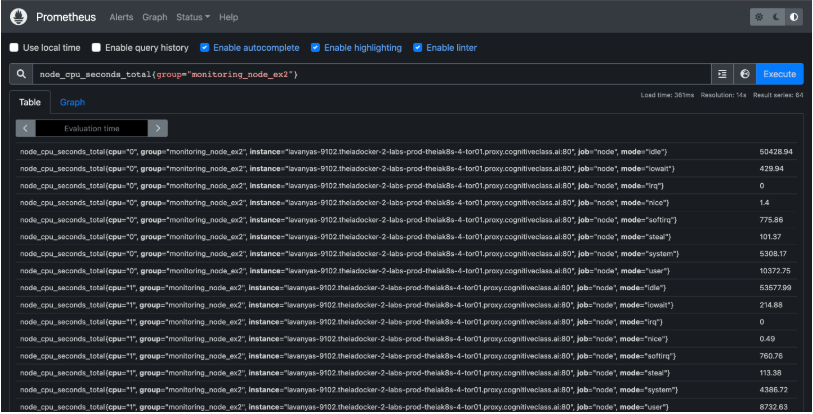

4. Finally, query for the connections each node has using this query.
```
node_ipvs_connections_total
```

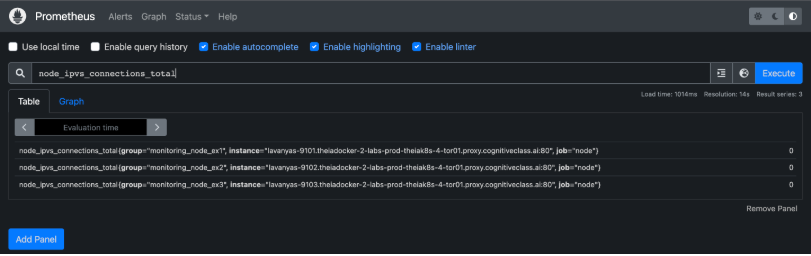
                                                                                                    `                   

# Step 6: Stop and observe

In this step we will stop one of the node exporter instances and see how that is reflected in the Prometheus console.

## Your Task

1. Open a new terminal.

2. Stop the node-exporter1 instance by running the following **`docker stop`** command and then switch back to old terminal in which prometheus is running.
```
docker stop node-exporter1
```

3. Now go back to the prometheus UI on your browser and check the targets by selecting the menu item **Status -> Targets**.

## Results

* You should now see that one of the node exporters is being monitored is down. 
* **Note**: You may have to refresh your browser to see the new status.

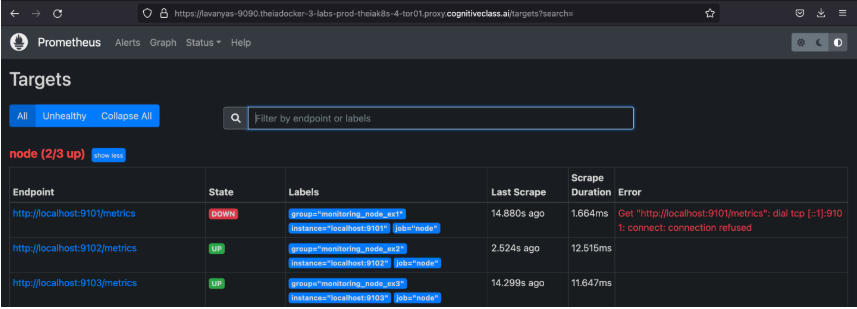

# Step 7: Start Grafana

1. Run the following command to pull Grafana from docker and run it. We will run it in the same network as node monitor and prometheus.
```
docker run --name=grafana -dp 3000:3000 --network monitor  grafana/grafana
```

2. Now press **`Launch Application`** button below to open the Grafana browser by connection.

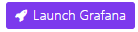

3. Log in with username as admin and password as admin. You may choose to set a new password. This will take you to the Grafana homepage.

> *If you set a new password, it will only last for that docker instance. When you restart you need to reset it*.

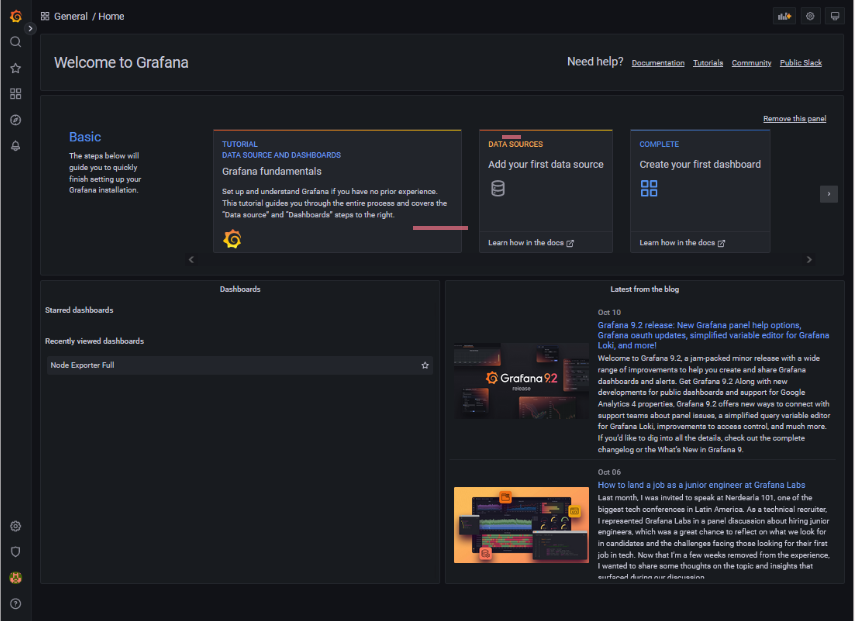

4. Click on **`Data Sources`** to add your first data source.

5. Choose **`Prometheus`** from the list of options available.

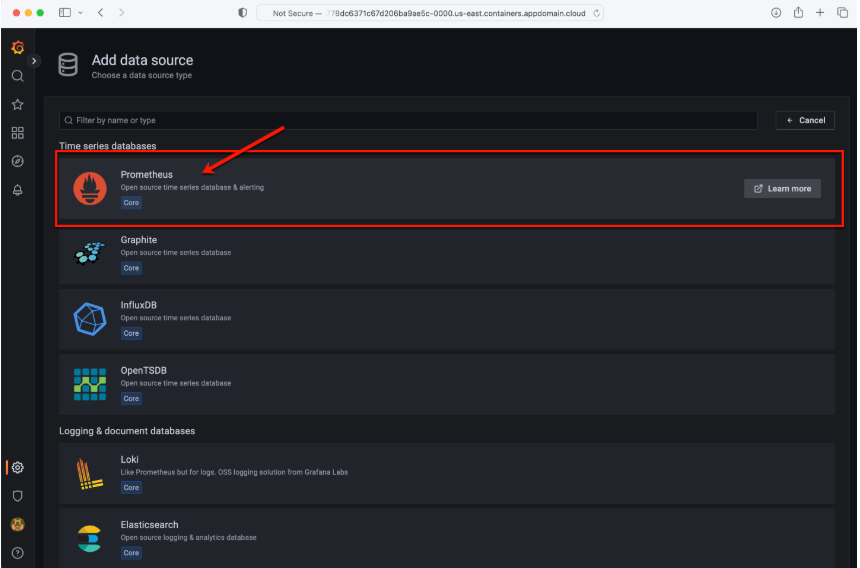


# Conclusion

**Congratulations!**
* You have completed this lab on Prometheus.
* You are now well on your way to monitoring your own applications to ensure they are running properly.

# Next Steps

* Your next challenge is to set up Prometheus in your development environment to monitor your applications.
* You some of the queries you have learned in this lab to check on the health and performance of your applications.